In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("df23.csv")

In [6]:
df.shape

(26874, 10)

In [8]:
df.head()

,Unnamed: 0,Address,County,Full,Date,Full Market Price,VAT exclusive,Latitude,Longitude,Price
0,0,"15 ST JOHNS TERRACE, OLD YOUGHAL RD, CORK CITY",Cork,"15 ST JOHNS TERRACE, OLD YOUGHAL RD, CORK CITY...",2023-01-01,1,0,51.911373,-8.442231,160000.0
1,1,"2 KINGS TERRACE, CORK CITY, CORK",Cork,"2 KINGS TERRACE, CORK CITY, CORK, Cork",2023-01-01,1,0,51.901490,-8.463452,180000.0
2,2,"22 COVE ST, CORK CITY, CORK",Cork,"22 COVE ST, CORK CITY, CORK, Cork",2023-01-01,1,0,51.895019,-8.475927,120000.0
3,3,"3 PARK HILL, SKEHARD RD, CORK",Cork,"3 PARK HILL, SKEHARD RD, CORK, Cork",2023-01-01,1,0,51.886775,-8.427577,320000.0
4,4,"4 SULLIVANS LANE, BARRACK ST, CORK",Cork,"4 SULLIVANS LANE, BARRACK ST, CORK, Cork",2023-01-01,1,0,51.892899,-8.478891,80000.0


In [10]:
missing_values = df[['Latitude', 'Longitude']].isnull().sum()
missing_values
#Visualisation of some column values
#df.hist(bins=50, figsize=(12, 8))
#plt.show()

Latitude     81
Longitude    80
dtype: int64

In [12]:
#Drop NAs, as well as the values that are oustide of the Irish borders (most likely missclasification)
df = df.dropna(subset=['Latitude', 'Longitude'])
df = df[df['Longitude'] <= -5.9]
print(df.shape)
print(df["Price"].memory_usage(deep=True))

(26780, 10)
428480


In [14]:
#Calculate the initial correlation between features
corr_matrix = df[["Latitude", "Longitude", "Price"]].corr()
corr_matrix["Price"].sort_values(ascending=False)

Price        1.000000
Longitude    0.065037
Latitude     0.007531
Name: Price, dtype: float64

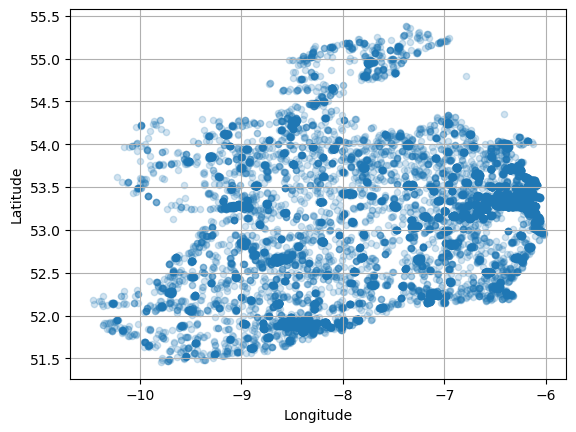

In [21]:
#Plot for the overall positions of the houses
df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.show()

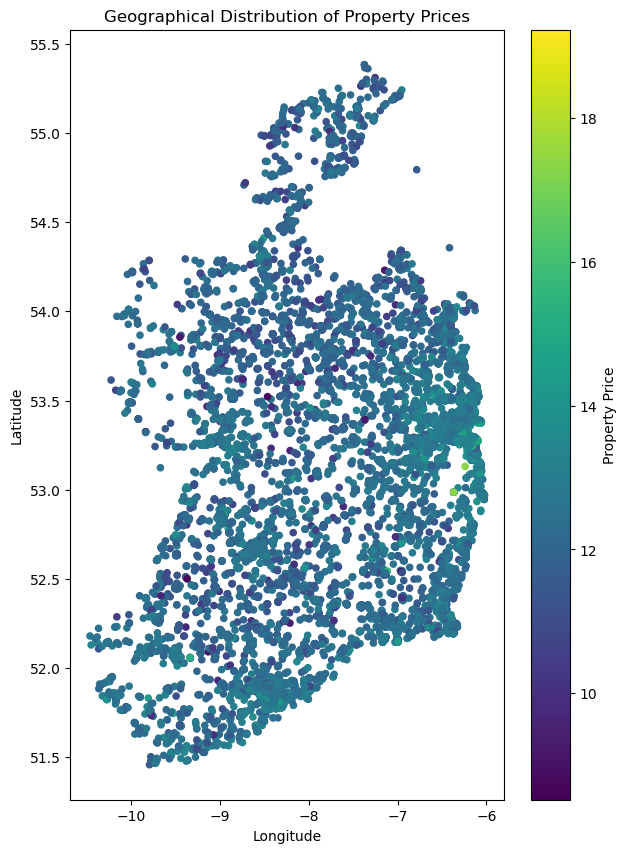

In [30]:
#Plot for positions coloured by the price
plt.figure(figsize=(7, 10))
plt.scatter(df['Longitude'], df['Latitude'], c=np.log(df['Price']), cmap='viridis', s=20)
plt.colorbar().set_label('Property Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Property Prices')
plt.grid(False)
plt.show()

<h3>Agglomerative Hierarchical Clustering</h3>

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

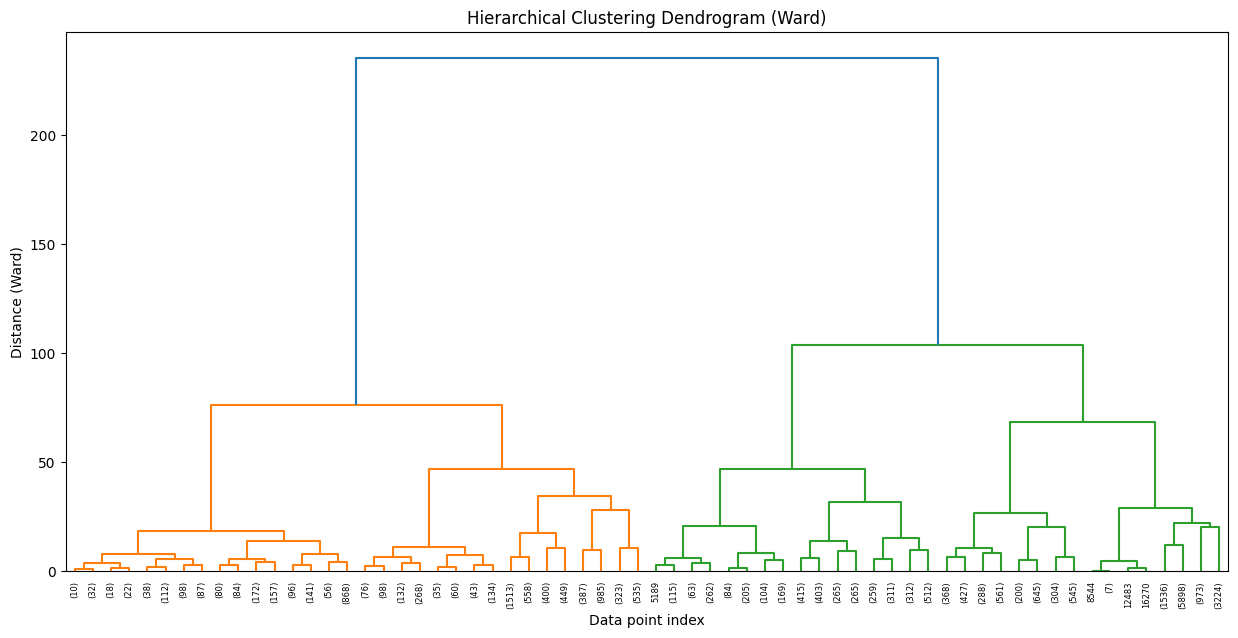

In [17]:
linked = linkage(df[['Latitude', 'Longitude']], method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Data point index')
plt.ylabel('Distance (Ward)')
plt.show()